In [1]:
import sys
sys.path.append("../..") 

In [2]:
import glob,os
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns

In [3]:
def get_metrics_from_folder(path):
    df_tests = []
    for folder in os.listdir(path):
        if folder.startswith('.') == False:
            pathm = os.path.join(path, folder, "metrics.csv")
            pathp = os.path.join(path, folder, "predictions_0.csv")
            if os.path.exists(pathp):
                # model name:
                #checkpoint = torch.load(chk_path)
                predictions = pd.read_csv(pathp,nrows=1)
                model_name = predictions.model[0]
                # model results:
                df_metrics = pd.read_csv(pathm)
                df_metrics = df_metrics.loc[:,['crps_mean','ig_mean','int_score_mean','var_pit','int_coverage','int_av_width','int_med_width','rmse']]
                df_metrics = df_metrics.dropna(how='all')
                df_metrics.loc[:,'model'] = model_name
                df_tests.append(df_metrics)
    df_test = pd.concat(df_tests, axis=0)
    return df_test

## Dimension of hidden state

In [4]:
metrics = ["crps_mean","int_score_mean","rmse","ig_mean"]

In [5]:
metric_name = {"crps_mean":"CRPS","int_score_mean":"Interval score","rmse":"RMSE","ig_mean":"Ignorance score"}

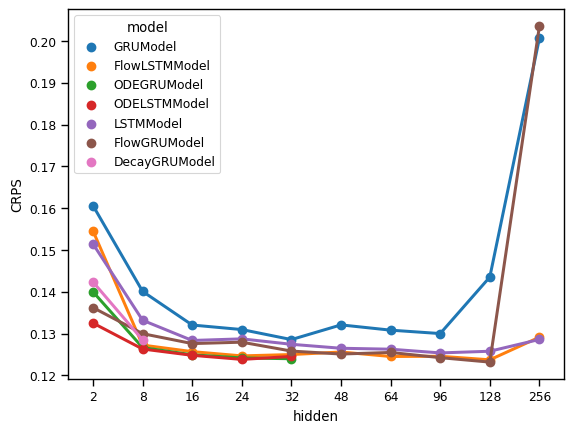

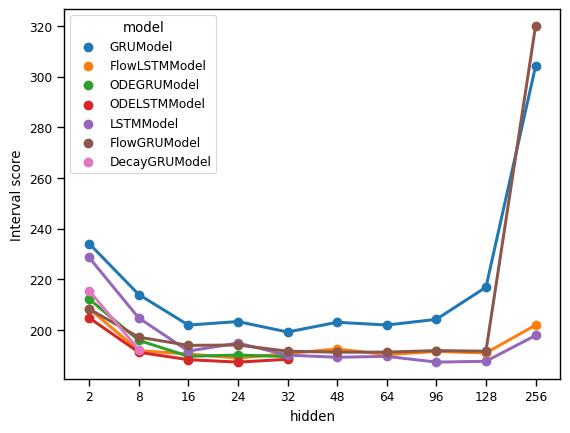

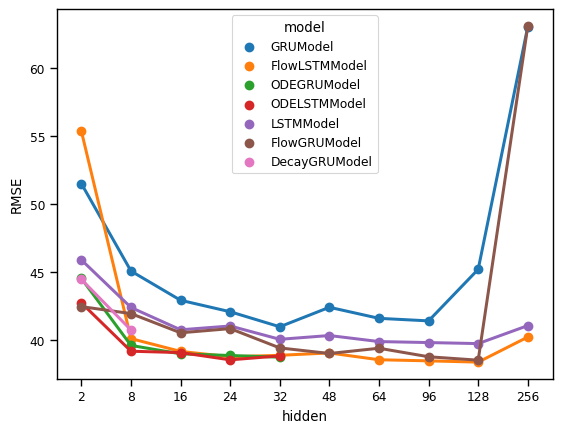

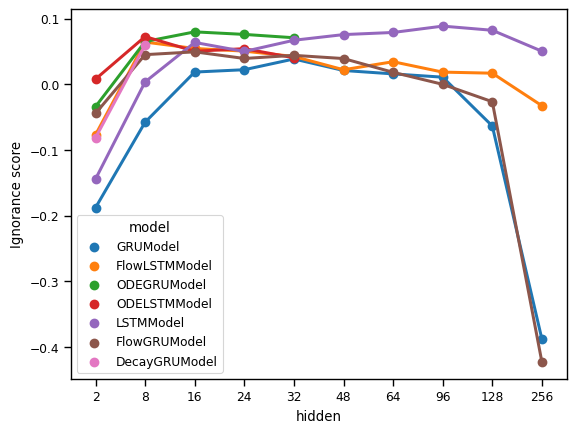

In [6]:
pth = "../../experiments/mimic/hyperparameters/hidden/"
dfs = []
for folder in os.listdir(pth):
    h = folder[1:]
    df = get_metrics_from_folder(pth + folder)
    df.loc[:,'hidden'] = int(h)
    dfs.append(df)
results = pd.concat(dfs)
for metric in metrics:
    sns.set_context("paper")
    f, ax = plt.subplots()
    sns.pointplot(y=metric, x="hidden",hue="model",data=results)
    handles, labels = ax.get_legend_handles_labels()
    ax.set_ylabel(metric_name[metric])
    plt.show()
    f.savefig('../../results/mimic_hyperparameter_hidden_dim_{}.png'.format(metric), dpi=300)

## Loss mixing parameter

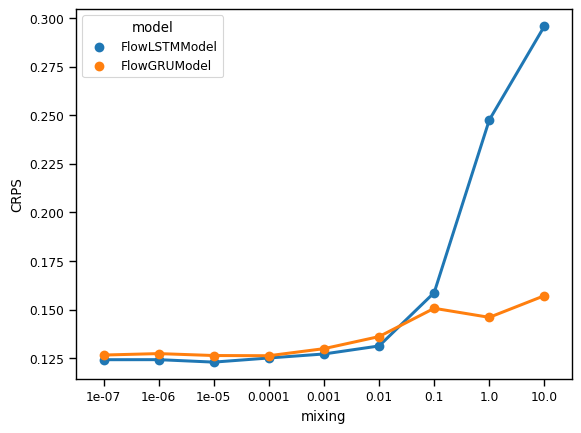

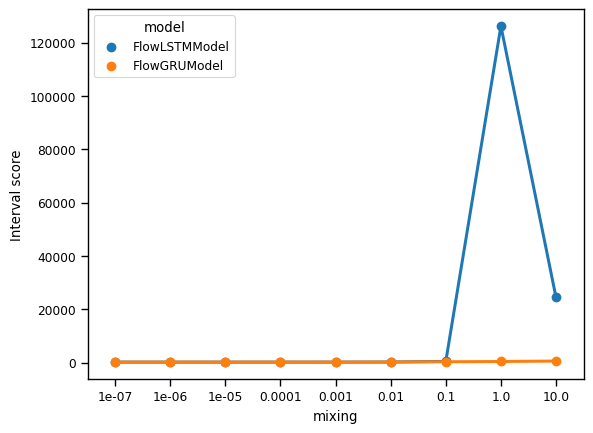

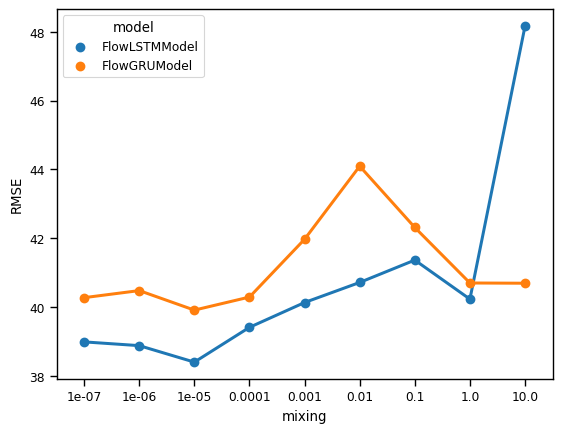

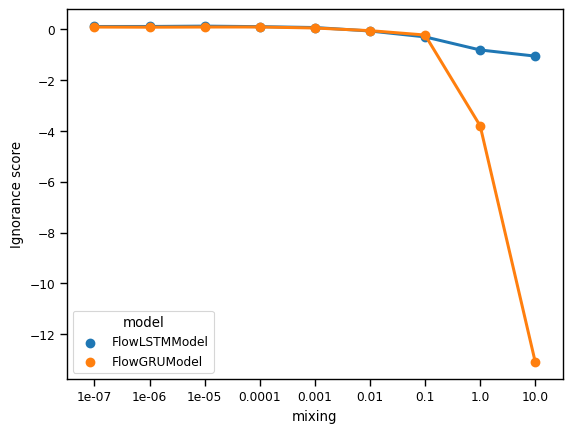

In [7]:
pth = "../../experiments/mimic/hyperparameters/mixing/"
dfs = []
for folder in os.listdir(pth):
    h = folder[1:]
    df = get_metrics_from_folder(pth + folder)
    df.loc[:,'mixing'] = float(h)
    dfs.append(df)
results = pd.concat(dfs)
for metric in metrics:
    sns.set_context("paper")
    f, ax = plt.subplots()
    sns.pointplot(y=metric, x="mixing",hue="model",data=results)
    handles, labels = ax.get_legend_handles_labels()
    ax.set_ylabel(metric_name[metric])
    plt.show()
    f.savefig('../../results/mimic_hyperparameter_mixing_{}.png'.format(metric), dpi=300)

### Measurement error

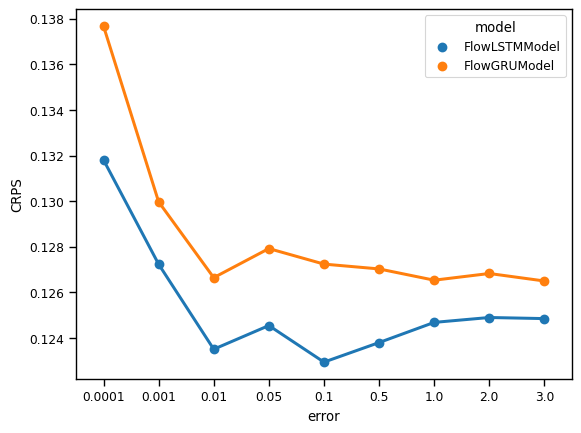

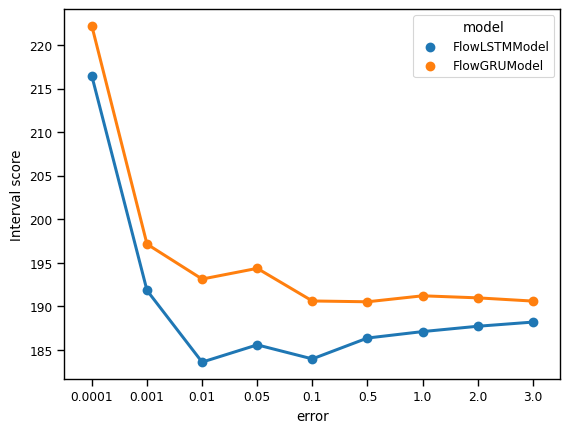

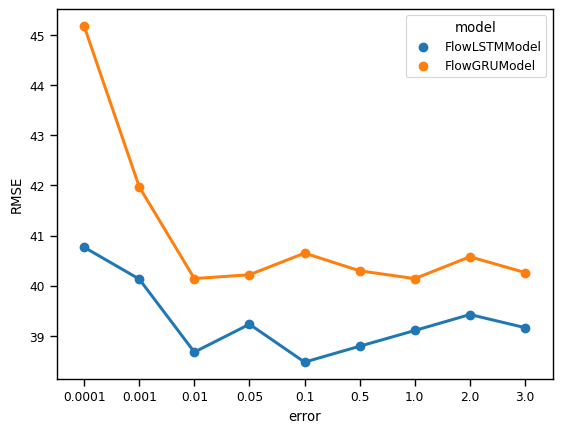

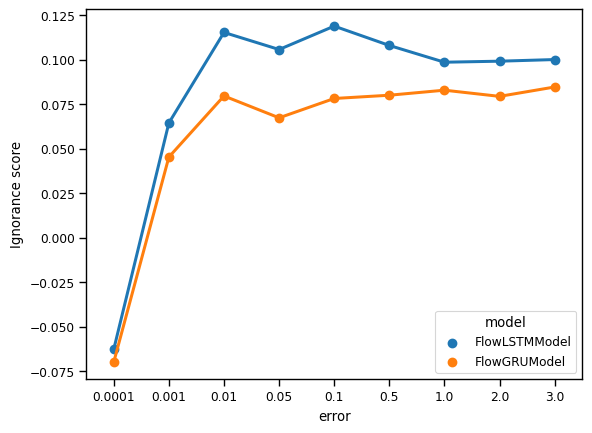

In [8]:
pth = "../../experiments/mimic/hyperparameters/error/"
dfs = []
for folder in os.listdir(pth):
    h = folder[1:]
    df = get_metrics_from_folder(pth + folder)
    df.loc[:,'error'] = float(h)
    dfs.append(df)
results = pd.concat(dfs)
for metric in metrics:
    sns.set_context("paper")
    f, ax = plt.subplots()
    sns.pointplot(y=metric, x="error",hue="model",data=results)
    handles, labels = ax.get_legend_handles_labels()
    ax.set_ylabel(metric_name[metric])
    plt.show()
    f.savefig('../../results/mimic_hyperparameter_error_{}.png'.format(metric), dpi=300)